# Superdense Coding In Cirq

Install cirq if you didn't in the previous exercise.

In [ ]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    %pip install --quiet cirq
    import cirq
    print("installed cirq.")
import cirq_google
from cirq.contrib.svg import SVGCircuit

# The Protocol
Superdense coding is an algorithm that allows the transmission of 2 bits of classical info using a single qubit (and using an entangled state).
The protocol can be easily summarized in the following picture:

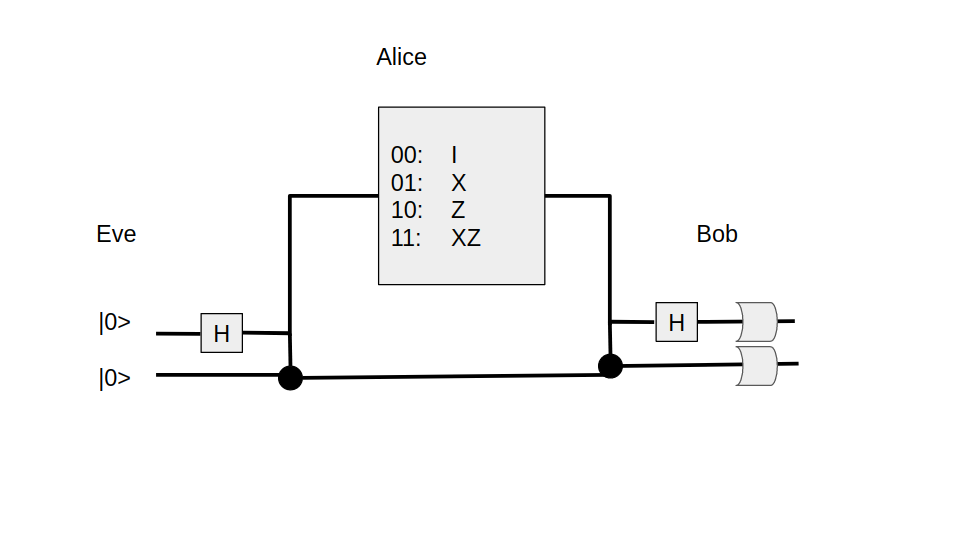

The implementation in cirq will look a little bit different than the picture. But it does exactly what is described there. Let's look at the cirq implementation:

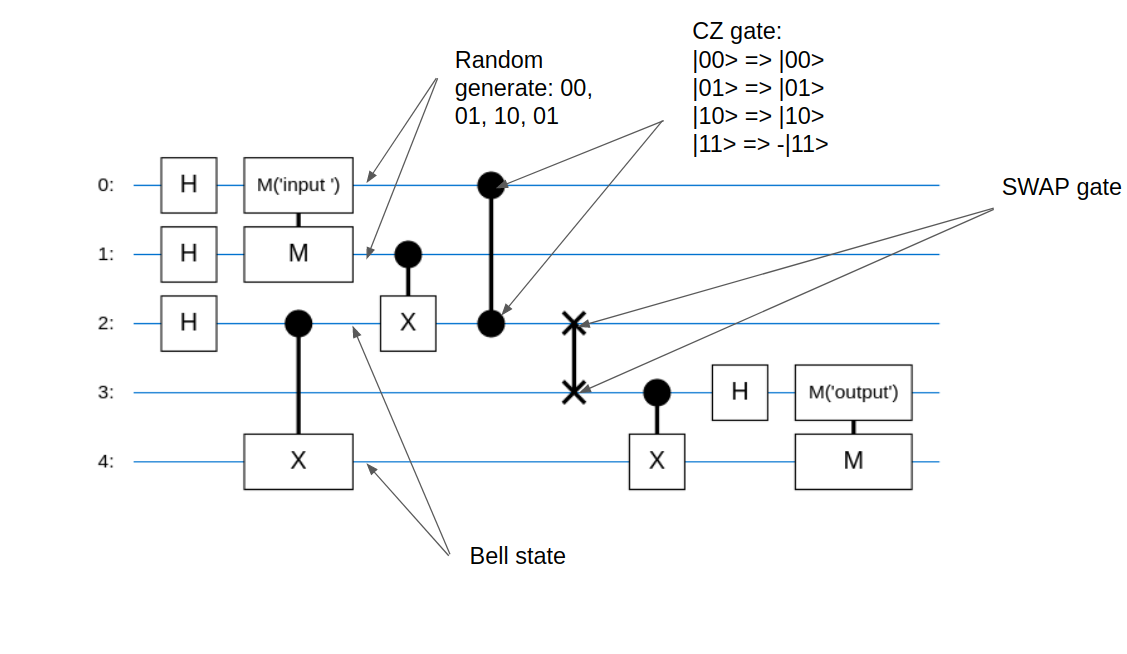


The H gates applied on 0 and 1 qubits followed by the measurement randomly generate one of the states 00,01,10,11. This is to simulate what Alice wants to send. On 2 we will do an H gate followed by a CNOT on 2,4. This is the bell state that Eve creates. The Swap gate is used to "transfer" the qubits from Alice to Bob after she applied the proper gate(s) on her qubits. After that, Bob decodes the info by doing a CNOT followed by an H, and then measures.
Now, let's analyze a bit how Alice encodes the info:
* If she wants to encode 00 then neither the 1,2 CNOT nor 0,2 CZ won't activate.
* If she wants to encode 01 then the 1,2 CNOT will activate. This means Alice applies X.
* If she wants to encode 10 then the 1,2 CNOT won't activate, but the CZ will. So, this will apply a Z gate on 2.
* If she wants to encode 11 then both the 1,2 CNOT and the 0,2 CZ will activate. So, this will apply an X gate and then a Z gate on 2.

# Exercise
Implement the Superdense Coding Protocol

In [ ]:
circuit = cirq.Circuit()
q0, q1, q2, q3, q4 = cirq.LineQubit.range(5)

# TODO: ADD 2 H gates on q0,q1 => Randomly sets q0 and q1 to either 0 or 1
# TODO: ADD measure on q0,q1 with key input

# TODO: Create Bell State to be shared on q2 and q4
# TODO: Step 1 of encoding (controlled NOT gate on q1 / q2)
# TODO: Step 2 of encoding (controlled Z gate on q0 / q2)
# TODO: Add Swap gate on q2,q3 => Sends encoded information to receiver
# TODO: Step 1 of decoding (controlled NOT gate on q3 and q4)
# TODO: Step 2 of decoding (Hadamard gate on q3)

# Measurement by receiver to decode bits
circuit.append(cirq.measure(q3, q4, key="output"))

sim = cirq.Simulator()
results = sim.run(circuit, repetitions=20)
print("\nResults:")
print(results)
SVGCircuit(circuit)
